In [4]:
from qdhmc import HMC
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def guassian_log_prob(n, temp):
    def lp(x):
        return np.sum([-1 * x[i] for i in range(n)] + [-1 * x[i]**2 for i in range(n)])/temp
    return lp

def sphere_log_prob(n, temp):
    def lp(x):
        return -1 * np.sum([x[i]**2 for i in range(n)])/temp
    return lp

def double_well_log_prob(temp):
    def lp(x):
        return (-1*(x[0]**4 - 4 * x[0]**2 + x[1]**2) - 0.5 * x[0])/temp
    return lp

def rosenbrock(n, temp):
    def lp(x):
        return -1 * np.sum([10 * (x[i + 1] - x[i])**2 + (1 - x[i])**2 for i in range(n-1)])/temp
    return lp

def styblinski_tang(n, temp):
    def lp(x):
        return -1/2 * np.sum([x[i]**4 - 16 * x[i]**2 + 5 * x[i] for i in range(n)])/temp
    return lp

In [6]:
def run_exp(t, rep, precision, n, opt_len, temperature, log_prob, experiments, step_size):
    classical = []
    quantum = []

    test_c = HMC(log_prob, kernel_type='classical', num_vars=n, precision=precision, step_size=step_size)
    test_q = HMC(log_prob, kernel_type='quantum', precision=precision, r=rep, num_vars=n, t=t)
    
    for e in range(experiments):
        if e % 8 == 0:
            print(e)
        init_state = tf.random.uniform(shape=[n], minval=-tf.math.sqrt(2 * np.pi * 2 ** precision) / 4, \
                                        maxval=tf.math.sqrt(2 * np.pi * 2 ** precision) / 4)
        
        init = log_prob(init_state)

        s, m, std, a, rs = test_c.run_hmc(opt_len[0], 0, init_state=init_state)
        s_q, m_q, std_q, a_q, rs_q = test_q.run_hmc(opt_len[1], 0, init_state=init_state)

        classical.append(rs.target_log_prob.numpy().tolist())
        classical[-1].insert(0, init)
        quantum.append(rs_q.target_log_prob.numpy().tolist())
        quantum[-1].insert(0, init)
        
    return classical, quantum

In [7]:
def plot_exp(c, q):
    cs_mean = np.mean(c, axis=0)
    qs_mean = np.mean(q, axis=0)

    x_c = [i for i in range(len(cs_mean))]
    x_q = [i for i in range(len(qs_mean))]

    cs_ci = 1.96 * np.std(c, axis=0)/np.sqrt(100)
    qs_ci = 1.96 * np.std(q, axis=0)/np.sqrt(100)

    fig, ax = plt.subplots(figsize=(14, 6))

    ax.plot(cs_mean, label='Classical')
    ax.plot(qs_mean, label='Quantum')

    ax.fill_between(x_c, (cs_mean - cs_ci), (cs_mean + cs_ci), color='b', alpha=.1)
    ax.fill_between(x_q, (qs_mean - qs_ci), (qs_mean + qs_ci), color='orange', alpha=.1)

    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.legend()
    plt.show()

In [10]:
# HYPERPARAMETERS
experiments = 50
cold = 0.01
warm = 0.1

# Guassian

In [11]:
step_size = 0.314813295575933
trotter_time = 1.2669737917875925
trotter_steps = 6
precision = 6
opt_len = [1000, 1000] #c, q

In [12]:
num_variables = 2
temp = warm
log_prob = guassian_log_prob(num_variables, temp)

classical_guas, quantum_guas = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [13]:
#plot_exp(classical_guas, quantum_guas)

In [14]:
step_size = 0.05859189464811009
trotter_time = 0.7173000492849074
trotter_steps = 2
precision = 6
opt_len = [1000, 1000] #c, q

In [15]:
num_variables = 2
temp = cold

log_prob = guassian_log_prob(num_variables, temp)

classical_guas_t, quantum_guas_t = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [16]:
#plot_exp(classical_guas_t, quantum_guas_t)

# Rosenbrock

In [17]:
step_size = 0.01905526527796041
trotter_time = 1.9015627356839464
trotter_steps = 3
precision = 2
opt_len =  [1000, 1000] #c, q

In [18]:
num_variables = 3
temp = warm
log_prob = rosenbrock(num_variables, temp)

classical_ros, quantum_ros = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [19]:
#plot_exp(classical_ros, quantum_ros)

In [20]:
step_size = 0.026
trotter_time = 0.5832768163008537
trotter_steps = 7
precision = 3
opt_len =  [1000, 1000] #c, q

In [21]:
num_variables = 3
temp = cold
log_prob = rosenbrock(num_variables, temp)

classical_ros_t, quantum_ros_t = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)


0
8
16
24
32
40
48


In [22]:
#plot_exp(classical_ros_t, quantum_ros_t)

# Double well

In [23]:
step_size = 0.07948701832532529
trotter_time = 1.8499924840755377
trotter_steps = 9
precision = 2
opt_len =  [1000, 1000]#c, q

In [24]:
num_variables = 2
temp = warm
log_prob = double_well_log_prob(temp)

classical_dw, quantum_dw = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [25]:
#plot_exp(classical_dw, quantum_dw)

In [26]:
step_size = 0.7489681325184813
trotter_time = 1.6141954191198948
trotter_steps = 3
precision = 5
opt_len =  [1000, 1000]#c, q

In [27]:
num_variables = 2
temp = cold
log_prob = double_well_log_prob(temp)

classical_dw_t, quantum_dw_t = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


# Styblinski Tang

In [28]:
step_size = 0.008153617240715425
trotter_time = 1.0171715451360417
trotter_steps = 10
precision = 2
opt_len =  [1000, 1000] #c, q

In [29]:
num_variables = 3
temp = warm
log_prob = styblinski_tang(num_variables, temp)

classical_st, quantum_st = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [30]:
#plot_exp(classical_st, quantum_st)

In [31]:
step_size = 0.016209118753477303
trotter_time = 1.1957011622141374
trotter_steps = 7
precision = 2
opt_len =  [1000, 1000] #c, q

In [32]:
num_variables = 3
temp = cold
log_prob = styblinski_tang(num_variables, temp)

classical_st_t, quantum_st_t = run_exp(trotter_time, trotter_steps, precision, num_variables, opt_len, temp, log_prob, experiments, step_size)

0
8
16
24
32
40
48


In [35]:
def plot_sub_fig(c, q, ax, t=1):
    cs_mean = -np.mean(c, axis=0) * t
    qs_mean = -np.mean(q, axis=0) * t

    x_c = [i for i in range(len(cs_mean))]
    x_q = [i for i in range(len(qs_mean))]

    cs_ci = 1.96 * np.std(c, axis=0)/np.sqrt(100) * t 
    qs_ci = 1.96 * np.std(q, axis=0)/np.sqrt(100) * t

    ax.plot(cs_mean, label='Classical')
    ax.plot(qs_mean, label='Quantum')

    ax.fill_between(x_c, (cs_mean - cs_ci), (cs_mean + cs_ci), color='b', alpha=.1)
    ax.fill_between(x_q, (qs_mean - qs_ci), (qs_mean + qs_ci), color='orange', alpha=.1)
    
    if log:
        ax.set_yscale('symlog')
    
    #plt.xlabel("Iteration")
    #plt.ylabel("Energy")

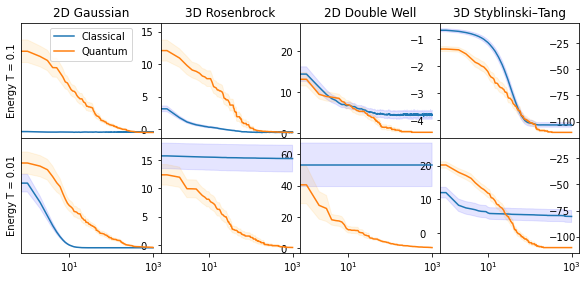

In [50]:
# export graphs as pdf or vector plot
fig, axs = plt.subplots(2, 4, figsize=(10, 4))

log = False

plot_sub_fig(classical_guas, quantum_guas, axs[0, 0], warm)
plot_sub_fig(classical_guas_t, quantum_guas_t, axs[1, 0], cold)

plot_sub_fig(classical_ros, quantum_ros, axs[0, 1], warm)
plot_sub_fig(classical_ros_t, quantum_ros_t, axs[1, 1], cold)

plot_sub_fig(classical_dw, quantum_dw, axs[0, 2], warm)
plot_sub_fig(classical_dw_t, quantum_dw_t, axs[1, 2], cold)

plot_sub_fig(classical_st, quantum_st, axs[0, 3], warm)
plot_sub_fig(classical_st_t, quantum_st_t, axs[1, 3], cold)

axs[0, 0].legend(loc="upper center")
axs[0, 0].set_ylabel("Energy T = 0.1")
axs[1, 0].set_ylabel("Energy T = 0.01")
axs[0, 0].set_title('2D Gaussian')
axs[0, 1].set_title('3D Rosenbrock')
axs[0, 2].set_title('2D Double Well')
axs[0, 3].set_title('3D Styblinski–Tang')


plot_margin = 110


axs[0, 0].tick_params(axis="y",direction="in", pad=-20)
axs[0, 1].tick_params(axis="y",direction="in", pad=-20)
axs[0, 2].tick_params(axis="y",direction="in", pad=-30)
axs[0, 3].tick_params(axis="y",direction="in", pad=-30)

axs[1, 0].tick_params(axis="y",direction="in", pad=-20)
axs[1, 1].tick_params(axis="y",direction="in", pad=-20)
axs[1, 2].tick_params(axis="y",direction="in", pad=-20)
axs[1, 3].tick_params(axis="y",direction="in", pad=-30)

for ax in axs[0]:
    ax.set_xticks([])
    #ax.margins(x = 0.2)
    ax.set_xscale('log')
    
for ax in axs[1]:
    #ax.set_xticks([0, 200, 400, 600, 800, 1000])
    ax.set_xscale('log')


for ax in axs:
    for a in ax:
        #a.tick_params(axis="y", direction="in", pad=-25)
        a.yaxis.tick_right()
        x0, x1, y0, y1 = a.axis()
        a.axis((x0,
          x1 + plot_margin,
          y0,
          y1))  

plt.subplots_adjust(bottom=0.1, 
                    top=0.9, 
                    wspace=0.0,
                    hspace=0.0)

plt.savefig("opt.svg", format = 'svg', dpi=300, bbox_inches='tight')
plt.show()


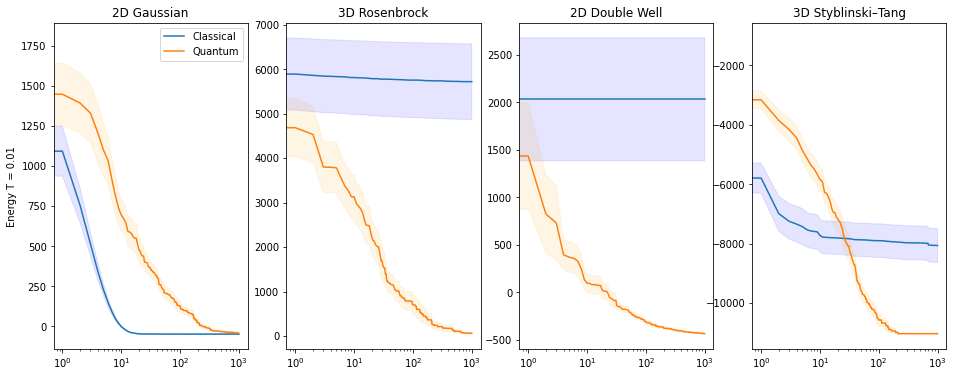

In [52]:
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

plot_sub_fig(classical_guas_t, quantum_guas_t, axs[0])

plot_sub_fig(classical_ros_t, quantum_ros_t, axs[1])

plot_sub_fig(classical_dw_t, quantum_dw_t, axs[2])

plot_sub_fig(classical_st_t, quantum_st_t, axs[3])

axs[0].legend()
axs[0].set_ylabel("Energy T = 0.01")
axs[0].set_title('2D Gaussian')
axs[1].set_title('3D Rosenbrock')
axs[2].set_title('2D Double Well')
axs[3].set_title('3D Styblinski–Tang')

for ax in axs:
    ax.set_xscale('log')

plt.show()